## CStree from (Duarte & Solus, 2022)

We create the CStree from Figure 1. of (Duarte & Solus, 2022).

In [132]:
import logging
import sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import cstrees.cstree as ct
import cstrees.stage as st

%load_ext autoreload
%autoreload 2
#logging.basicConfig(stream=sys.stderr, level=logging.ERROR)
logging.basicConfig(stream=sys.stderr, level=logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create the CStree

This CStree has four levels, 0,...,3, which we label as X1,...,X4, each having cardinality 2 (i.e. can take values in the set {0, 1}).

In [133]:
np.random.seed(2)

tree = ct.CStree([2, 2, 2, 2], labels=["X"+str(i) for i in range(1, 5)])

We set/update the stages level-wise, by a dict containing the levels and the values of the contexts.
We also add the color some of the stages by the "color" key of the dict. Note that singleton stages will be automatically be colored in black.

In [134]:
tree.update_stages({
    0: [{"context": {0: 0}},
        {"context": {0: 1}}],
    1: [{"context": {1: 0}, "color": "green"},
        {"context": {0: 0, 1: 1}},
        {"context": {0: 1, 1: 1}}],
    2: [{"context": {0: 0, 2: 0}, "color": "blue"},
        {"context": {0: 0, 2: 1}, "color": "orange"},
        {"context": {0: 1, 2: 0}, "color": "red"},
        {"context": {0: 1, 1: 1, 2: 1}},
        {"context": {0: 1, 1: 0, 2: 1}}]
})

We sample the parameters for each stage from the Beta distribution with parameter alpha (in general, for non-binary variables, this will be the Dirichlet distribution). 

In [135]:
tree.sample_stage_parameters(alpha=1)

Below we plot full CStree by using the full flag of the plot method. Note that the parameter full defaults to False in which case it will only plot the part of the tree that was used for sampling data. This is to prevent from plotting and building very large trees. The plot method returns an AGraph, which is a pygraphviz object that represents a graph. It can eiter be drawn in the notebook or saved to file (commented out).

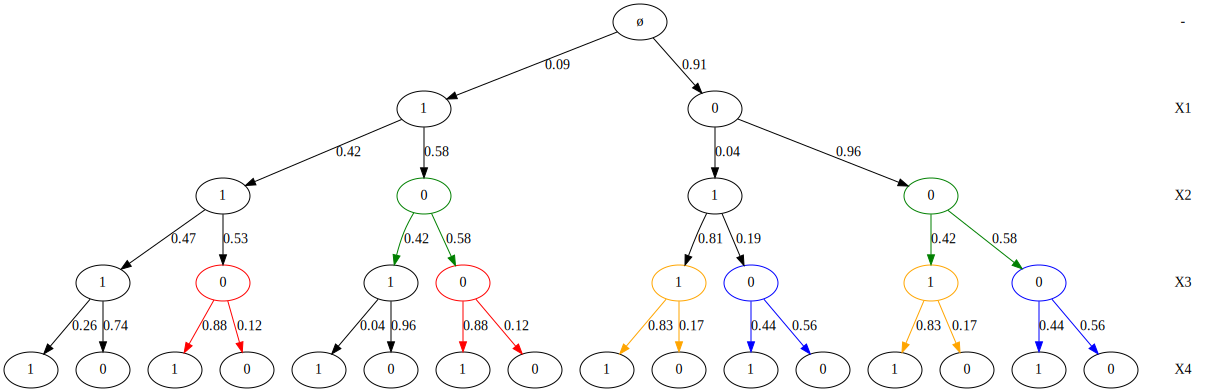

In [136]:
a = tree.plot(full=True)
a
#a.draw("fig1_demo.png")

### The CSI relations

One can print the CSI relations (groupted by context) that the CStree encode, using the csi_relations() method.

In [137]:
rels = tree.csi_relations()
for cont, rels in rels.items():
    for rel in rels:
        print(rel)

X1 ⊥ X3 | X2=0
X2 ⊥ X4 | X1=0, X3=0
X2 ⊥ X4 | X1=0, X3=1
X2 ⊥ X4 | X1=1, X3=0


### The minimal context CSI relations

You may also plot the minimal CSI relations as below. See the paper for definition of a minimal CSI.

In [138]:
minl_csis = tree.to_minimal_context_csis()
for cont, csis in minl_csis.items():
    for csi in csis:
        print(csi)

X1 ⊥ X3 | X2=0
X2 ⊥ X4 | X1, X3=0
X2 ⊥ X4 | X3, X1=0


### The minimal context DAGs

We can also plot the minimal context DAGs based on the minimal context CSIs.
These are grouped by the minimal contexts and represented by pygraphviz graphs.

In [139]:
# Get Graphviz graphs for plotting
agraphs = tree.to_minimal_context_agraphs()
keys = list(agraphs.keys())

X2=0


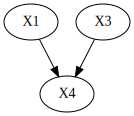

In [140]:
print(keys[0])
agraphs[keys[0]]

X3=0


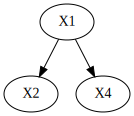

In [141]:
print(keys[1])
agraphs[keys[1]]

X1=0


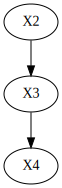

In [142]:
print(keys[2])
agraphs[keys[2]]

### Sampling data

Data sampled from a CStree is stored as a Pandas dataframe, with labels inherited from the CStree level labels. The second row contains the cardinalities of variables.

In [143]:
df = tree.sample(10)
df

,X1,X2,X3,X4
0,2,2,2,2
1,0,0,1,1
2,0,0,1,1
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,1
7,0,0,0,0
8,0,0,1,0
9,0,1,1,1


### Write the CStree structure to a Pandas dataframe

You may save/serialize a CStree to a Pandas dataframe. The first row shows tha cardinalities of the variables. Each other row represent a stage, where the last columns of each row represent the distribution for each stage.

In [144]:
treedf = tree.to_df(write_probs=True)
treedf

,X1,X2,X3,X4,PROB_0,PROB_1
0,2,2,2,2,NaN,NaN
1,0,-,-,-,0.956144,0.043856
2,1,-,-,-,0.582621,0.417379
3,*,0,-,-,0.576286,0.423714
4,0,1,-,-,0.191666,0.808334
5,1,1,-,-,0.534362,0.465638
6,0,*,0,-,0.563052,0.436948
7,0,*,1,-,0.167056,0.832944
8,1,*,0,-,0.117001,0.882999
9,1,1,1,-,0.738383,0.261617


### Read CStree from a Pandas dataframe

You may easily read a CStree from a Pandas dataframe. A CStree can thus be saved to file as a usual Pandas dataframe.

In [145]:
t = ct.df_to_cstree(treedf)
t.to_df(write_probs=True)

,X1,X2,X3,X4,PROB_0,PROB_1
0,2,2,2,2,NaN,NaN
1,0,-,-,-,0.956144,0.043856
2,1,-,-,-,0.582621,0.417379
3,*,0,-,-,0.576286,0.423714
4,0,1,-,-,0.191666,0.808334
5,1,1,-,-,0.534362,0.465638
6,0,*,0,-,0.563052,0.436948
7,0,*,1,-,0.167056,0.832944
8,1,*,0,-,0.117001,0.882999
9,1,1,1,-,0.738383,0.261617


Use plot(full=True) to draw the full tree.


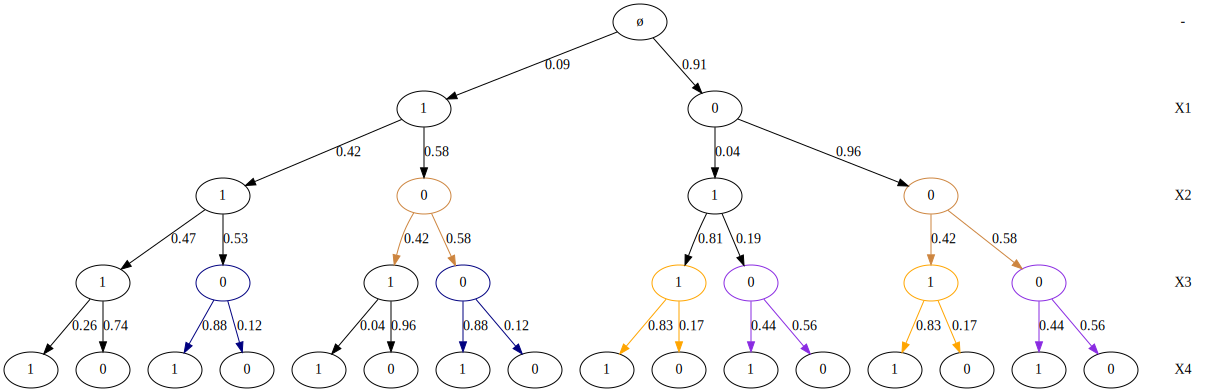

In [146]:
t.plot()